### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attributr  information

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
sns.set(rc={'figure.figsize': [10, 8]}, font_scale=1.2)

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12    24     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## Get the information of data

In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


In [6]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level       stroke  
count        5110.000000  5110.000000  
mean          106.147677     0.048728  
std            45.283560     0.215320  
min            55.120000     0.000000  
25%            77.245000     0.000000  
50%            91.885000     0.000000  
75%           114.090000     0.000000  
max           271.740000     1.000000

## Check duplicated

In [7]:
df.duplicated().sum()

0

## Check null values

In [8]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

## Drop columns

In [9]:
df.drop('id',inplace=True,axis=1)

## Univariate Analysis

In [10]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

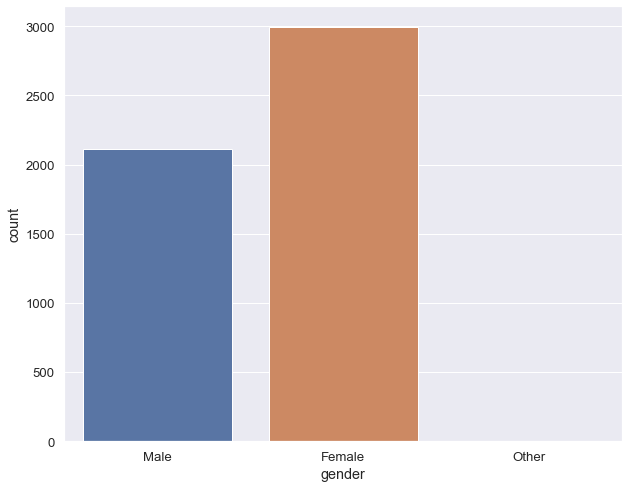

In [11]:
sns.countplot(data=df,x='gender')

In [12]:
df[df['gender']=='Other']

gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In [13]:
df.drop(labels=3116,inplace=True,axis=0)

In [14]:
df['age'].describe().to_frame().T

count       mean        std   min   25%   50%   75%   max
age  5109.0  43.229986  22.613575  0.08  25.0  45.0  61.0  82.0

In [15]:
df['age']=df['age'].astype('int')

In [16]:
df['age'].describe().to_frame().T

count       mean        std  min   25%   50%   75%   max
age  5109.0  43.218634  22.634799  0.0  25.0  45.0  61.0  82.0

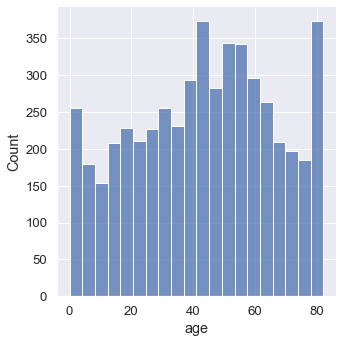

In [17]:
sns.displot(data=df,x='age')

In [18]:
df[df['age']==0.08]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [19]:
df.drop(labels=[1614,3295],inplace=True,axis=0)

In [20]:
df['age'].describe().to_frame().T

count       mean        std  min   25%   50%   75%   max
age  5107.0  43.235559  22.623061  0.0  25.0  45.0  61.0  82.0

In [21]:
df[df['age']<1]

gender  age  hypertension  heart_disease ever_married work_type  \
363   Female    0             0              0           No  children   
376   Female    0             0              0           No  children   
564   Female    0             0              0           No  children   
982     Male    0             0              0           No  children   
996     Male    0             0              0           No  children   
1093  Female    0             0              0           No  children   
1206  Female    0             0              0           No  children   
1317    Male    0             0              0           No  children   
1600    Male    0             0              0           No  children   
1808  Female    0             0              0           No  children   
1975    Male    0             0              0           No  children   
1999    Male    0             0              0           No  children   
2008    Male    0             0              0           No  children   
2012    Male    0             0              0           No  children   
2030    Male    0             0              0           No  children   
2358    Male    0             0              0           No  children   
2481    Male    0             0              0           No  children   
2490    Male    0             0              0           No  children   
2579    Male    0             0              0           No  children   
2630  Female    0             0              0           No  children   
2801    Male    0             0              0           No  children   
2875    Male    0             0              0           No  children   
2898    Male    0             0              0           No  children   
3251    Male    0             0              0           No  children   
3392    Male    0             0              0           No  children   
3440    Male    0             0              0           No  children   
3618    Male    0             0              0           No  children   
3626    Male    0             0              0           No  children   
3859    Male    0             0              0           No  children   
3894  Female    0             0              0           No  children   
3968    Male    0             0              0           No  children   
4007    Male    0             0              0           No  children   
4021    Male    0             0              0           No  children   
4053  Female    0             0              0           No  children   
4293    Male    0             0              0           No  children   
4409  Female    0             0              0           No  children   
4581  Female    0             0              0           No  children   
4645  Female    0             0              0           No  children   
4910  Female    0             0              0           No  children   
4929    Male    0             0              0           No  children   
5089  Female    0             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
363           Urban              83.82  24.9        Unknown       0  
376           Rural              88.11  15.5        Unknown       0  
564           Rural              73.71  16.2        Unknown       0  
982           Rural             157.57  19.2        Unknown       0  
996           Rural             118.87  16.3        Unknown       0  
1093          Rural              55.86    16        Unknown       0  
1206          Urban              66.36    23        Unknown       0  
1317          Rural              98.67  17.5        Unknown       0  
1600          Urban             109.56  14.3        Unknown       0  
1808          Urban              62.27  17.3        Unknown       0  
1975          Rural             111.77  21.1        Unknown       0  
1999          Rural             146.97  18.5        Unknown       0  
2008          Rural          

In [22]:
len(df[df['age']<1])

41

In [23]:
df.drop(df[df['age']<1].index,axis=0,inplace=True)

In [24]:
df['hypertension'].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
hypertension  5066.0  0.098302  0.297752  0.0  0.0  0.0  0.0  1.0

<AxesSubplot:xlabel='hypertension', ylabel='count'>

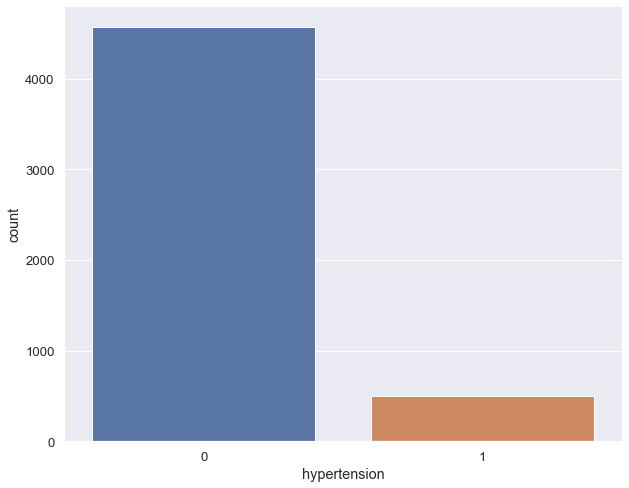

In [25]:
sns.countplot(data=df,x='hypertension')

In [26]:
df['heart_disease'].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
heart_disease  5066.0  0.054481  0.226986  0.0  0.0  0.0  0.0  1.0

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

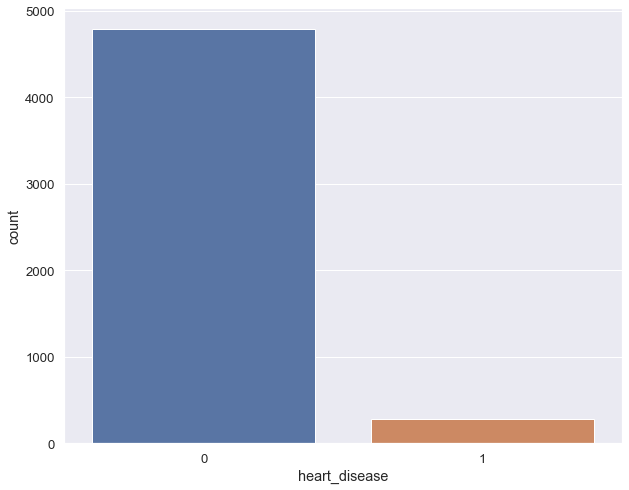

In [27]:
sns.countplot(data=df,x='heart_disease')

In [28]:
df['ever_married'].value_counts()

Yes    3353
No     1713
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

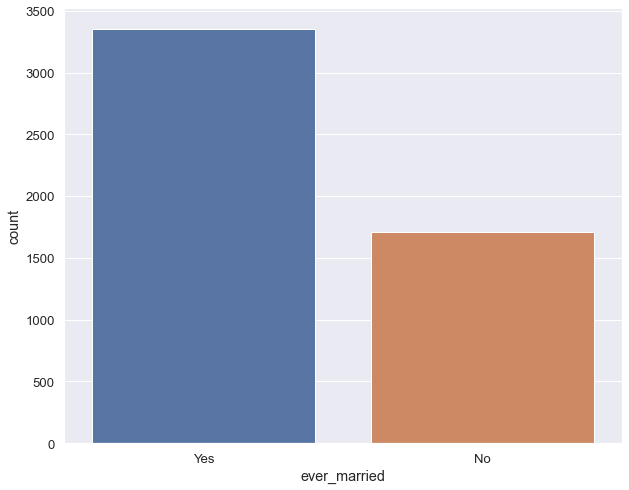

In [29]:
sns.countplot(data=df,x='ever_married')

In [30]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
Govt_job          657
children          644
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

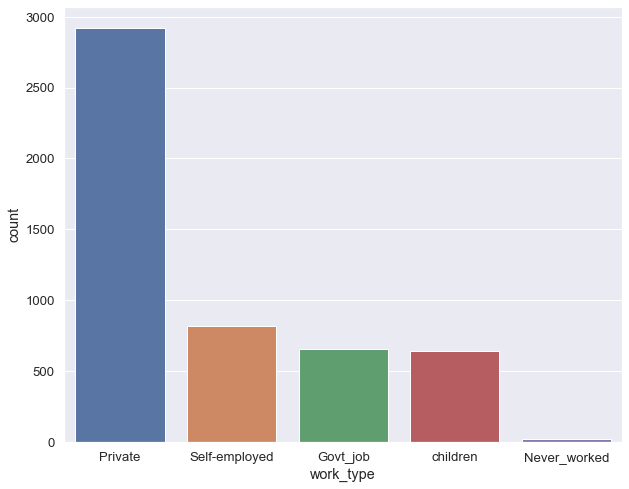

In [31]:
sns.countplot(data=df,x='work_type')

In [32]:
df['Residence_type'].value_counts()

Urban    2573
Rural    2493
Name: Residence_type, dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

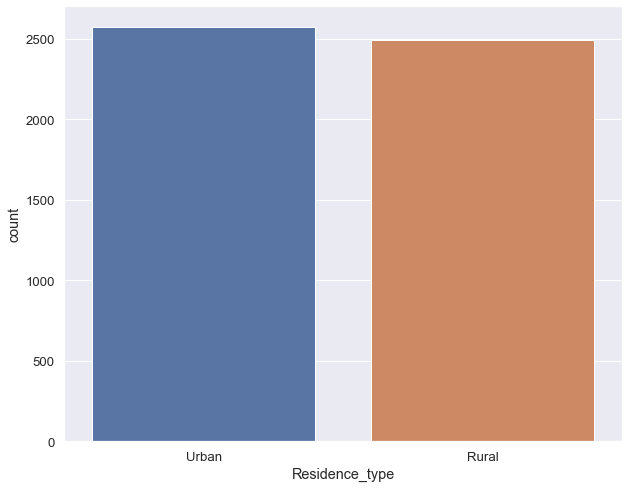

In [33]:
sns.countplot(data=df,x='Residence_type')

In [34]:
df['avg_glucose_level'].describe().to_frame().T

count        mean        std    min      25%    50%  \
avg_glucose_level  5066.0  106.234272  45.396013  55.12  77.2825  91.89   

                      75%     max  
avg_glucose_level  114.09  271.74

In [35]:
df['avg_glucose_level']=df['avg_glucose_level'].astype(int)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

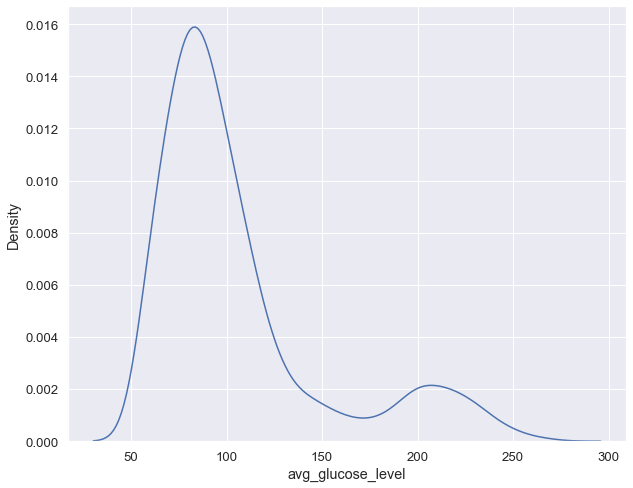

In [36]:
sns.kdeplot(data=df,x='avg_glucose_level')

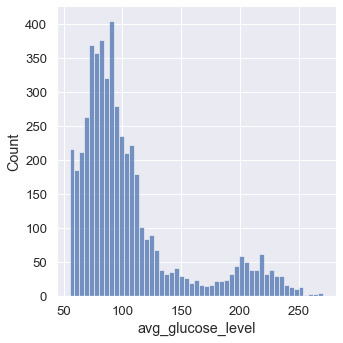

In [37]:
sns.displot(data=df,x='avg_glucose_level')

In [38]:
df['bmi'].unique().tolist()

['36.6',
 nan,
 '32.5',
 '34.4',
 '24',
 '29',
 '27.4',
 '22.8',
 '24.2',
 '29.7',
 '36.8',
 '27.3',
 'xx',
 '30.9',
 '37.5',
 '25.8',
 '37.8',
 '22.4',
 '48.9',
 '??',
 '27.2',
 '23.5',
 '28.2',
 '28.3',
 '25.4',
 '22.2',
 '26.5',
 '33.7',
 '32',
 '23.9',
 '28.5',
 '26.4',
 '20.2',
 '33.6',
 '38.6',
 '39.2',
 '27.7',
 '31.4',
 '36.5',
 '33.2',
 '32.8',
 '40.4',
 '25.3',
 '30.2',
 '47.5',
 '20.3',
 '30',
 '28.9',
 '28.1',
 '31.1',
 '21.7',
 '27',
 '24.1',
 '45.9',
 '44.1',
 '22.9',
 '29.1',
 '32.3',
 '41.1',
 '25.6',
 '29.8',
 '26.3',
 '26.2',
 '29.4',
 '24.4',
 '28',
 '28.8',
 '34.6',
 '19.4',
 '30.3',
 '41.5',
 '22.6',
 '56.6',
 '27.1',
 '31.3',
 '31',
 '31.7',
 '35.8',
 '28.4',
 '20.1',
 '26.7',
 '38.7',
 '29.9',
 '34.9',
 '26.6',
 '25',
 '23.8',
 '21.8',
 '27.5',
 '24.6',
 '32.9',
 '26.1',
 '31.9',
 '34.1',
 '36.9',
 '37.3',
 '45.7',
 '34.2',
 '23.6',
 '22.3',
 '37.1',
 '45',
 '25.5',
 '30.8',
 '37.4',
 '34.5',
 '27.9',
 '29.5',
 '46',
 '42.5',
 '35.5',
 '26.9',
 '45.5',
 '31.5',
 

In [39]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1501
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

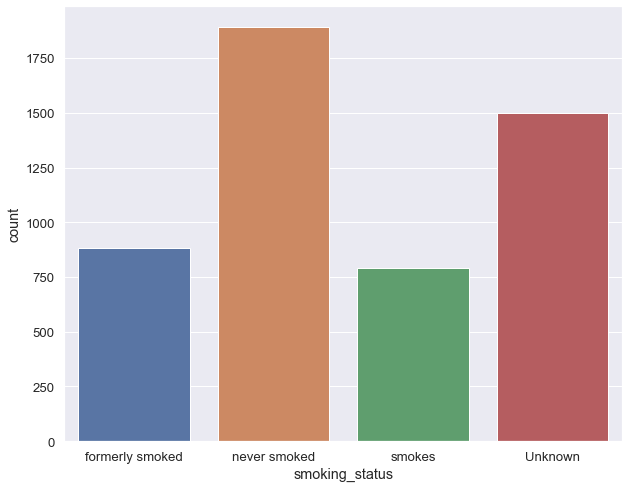

In [40]:
sns.countplot(data=df,x='smoking_status')

In [41]:
df['stroke'].value_counts()

0    4817
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

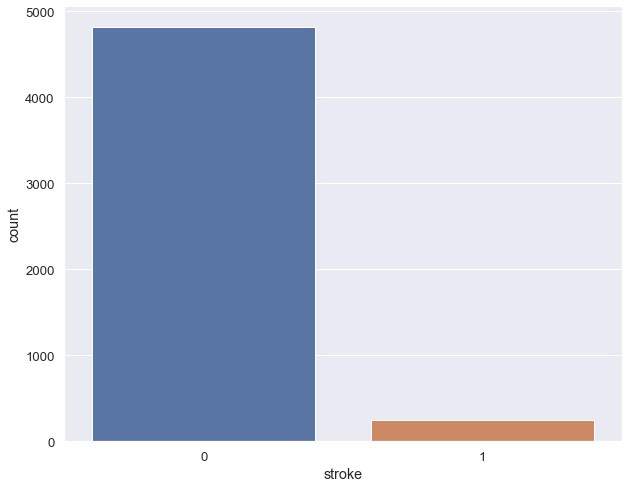

In [42]:
sns.countplot(data=df,x='stroke')

## Data cleaning

In [43]:
def fix_bmi(x):
    if x in ['xx','??']:
        return np.nan
    else:
        return x

In [44]:
df['bmi']=df['bmi'].apply(fix_bmi)

In [45]:
df['bmi'].unique().tolist()

['36.6',
 nan,
 '32.5',
 '34.4',
 '24',
 '29',
 '27.4',
 '22.8',
 '24.2',
 '29.7',
 '36.8',
 '27.3',
 '30.9',
 '37.5',
 '25.8',
 '37.8',
 '22.4',
 '48.9',
 '27.2',
 '23.5',
 '28.2',
 '28.3',
 '25.4',
 '22.2',
 '26.5',
 '33.7',
 '32',
 '23.9',
 '28.5',
 '26.4',
 '20.2',
 '33.6',
 '38.6',
 '39.2',
 '27.7',
 '31.4',
 '36.5',
 '33.2',
 '32.8',
 '40.4',
 '25.3',
 '30.2',
 '47.5',
 '20.3',
 '30',
 '28.9',
 '28.1',
 '31.1',
 '21.7',
 '27',
 '24.1',
 '45.9',
 '44.1',
 '22.9',
 '29.1',
 '32.3',
 '41.1',
 '25.6',
 '29.8',
 '26.3',
 '26.2',
 '29.4',
 '24.4',
 '28',
 '28.8',
 '34.6',
 '19.4',
 '30.3',
 '41.5',
 '22.6',
 '56.6',
 '27.1',
 '31.3',
 '31',
 '31.7',
 '35.8',
 '28.4',
 '20.1',
 '26.7',
 '38.7',
 '29.9',
 '34.9',
 '26.6',
 '25',
 '23.8',
 '21.8',
 '27.5',
 '24.6',
 '32.9',
 '26.1',
 '31.9',
 '34.1',
 '36.9',
 '37.3',
 '45.7',
 '34.2',
 '23.6',
 '22.3',
 '37.1',
 '45',
 '25.5',
 '30.8',
 '37.4',
 '34.5',
 '27.9',
 '29.5',
 '46',
 '42.5',
 '35.5',
 '26.9',
 '45.5',
 '31.5',
 '33',
 '23.4',

In [46]:
df['bmi']=pd.to_numeric(df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

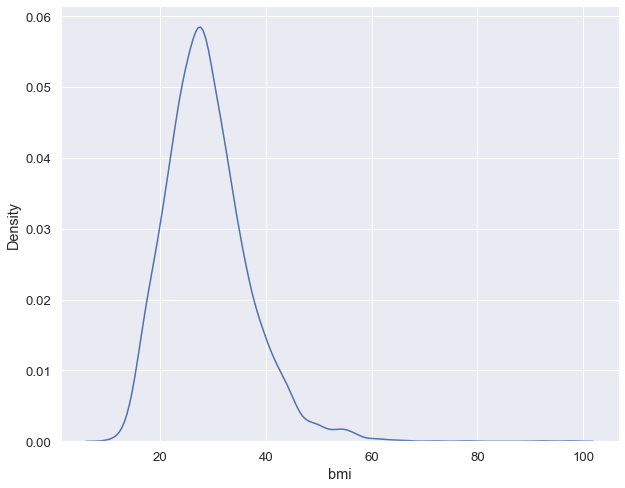

In [47]:
sns.kdeplot(data=df,x='bmi')

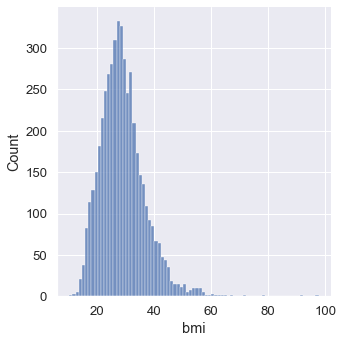

In [48]:
sns.displot(data=df,x='bmi')

## Feature Engineering

In [49]:
def Glucose_level(x):
    if x <100:
        return 'low'
    elif x in range(100,139):
        return 'normal'
    elif x in range(139,199):
        return 'prediabetes'
    else:
        return 'diabetes'

In [50]:
df['Glucose_level']=df['avg_glucose_level'].apply(Glucose_level)

In [51]:
df

gender  age  hypertension  heart_disease ever_married      work_type  \
0       Male   67             0              1          Yes        Private   
1     Female   61             0              0          Yes  Self-employed   
2       Male   80             0              1          Yes        Private   
3     Female   49             0              0          Yes        Private   
4     Female   79             1              0          Yes  Self-employed   
...      ...  ...           ...            ...          ...            ...   
5105  Female   80             1              0          Yes        Private   
5106  Female   81             0              0          Yes  Self-employed   
5107  Female   35             0              0          Yes  Self-employed   
5108    Male   51             0              0          Yes        Private   
5109  Female   44             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0             Urban                228  36.6  formerly smoked       1   
1             Rural                202   NaN     never smoked       1   
2             Rural                105  32.5     never smoked       1   
3             Urban                171  34.4           smokes       1   
4             Rural                174  24.0     never smoked       1   
...             ...                ...   ...              ...     ...   
5105          Urban                 83   NaN     never smoked       0   
5106          Urban                125  40.0     never smoked       0   
5107          Rural                 82  30.6     never smoked       0   
5108          Rural                166  25.6  formerly smoked       0   
5109          Urban                 85  26.2          Unknown       0   

     Glucose_level  
0         diabetes  
1         diabetes  
2           normal  
3      prediabetes  
4      prediabetes  
...            ...  
5105           low  
5106        normal  
5107           low  
5108   prediabetes  
5109           low  

[5066 rows x 12 columns]

## Univariate Analysis after Data cleaning and Feature Engineering

In [52]:
df['gender'].value_counts()

Female    2979
Male      2087
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

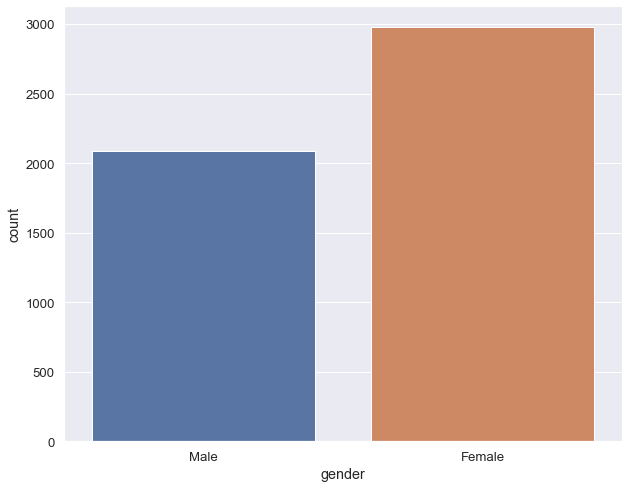

In [53]:
sns.countplot(data=df,x='gender')

In [54]:
df['age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
       41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

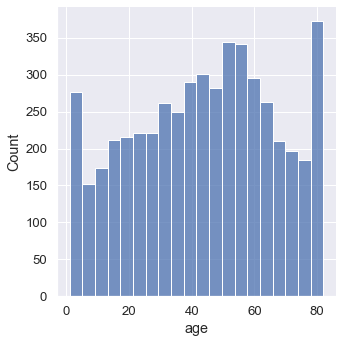

In [55]:
sns.displot(data=df,x='age')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

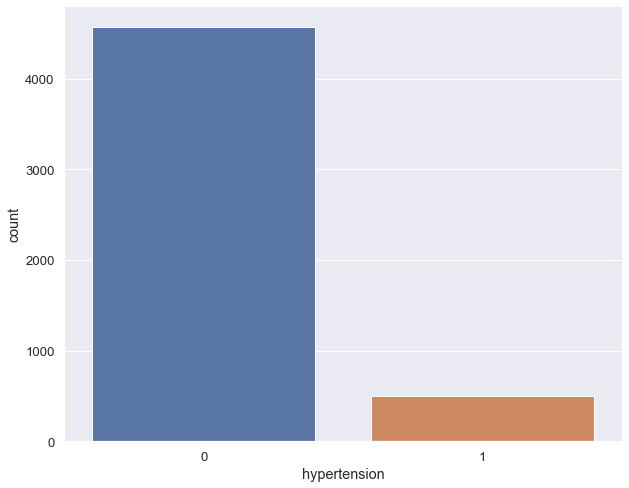

In [56]:
sns.countplot(data=df,x='hypertension')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

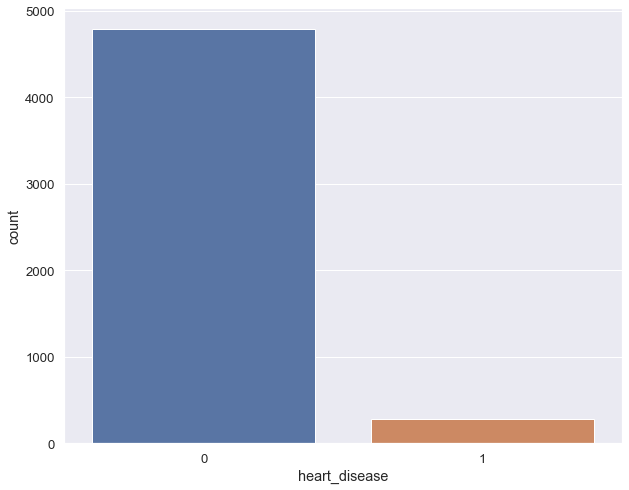

In [57]:
sns.countplot(data=df,x='heart_disease')

In [58]:
df['ever_married'].value_counts()

Yes    3353
No     1713
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

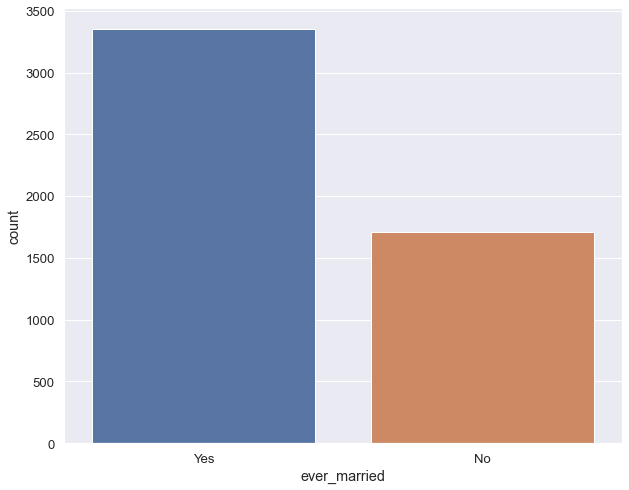

In [59]:
sns.countplot(data=df,x='ever_married')

In [60]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
Govt_job          657
children          644
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

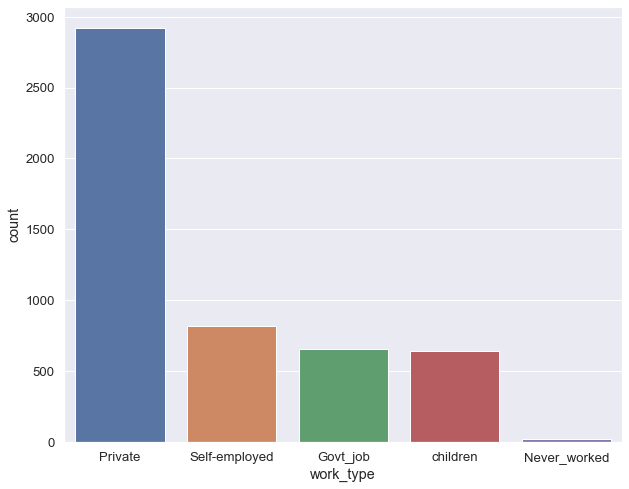

In [61]:
sns.countplot(data=df,x='work_type')

In [62]:
df['Residence_type'].value_counts()

Urban    2573
Rural    2493
Name: Residence_type, dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

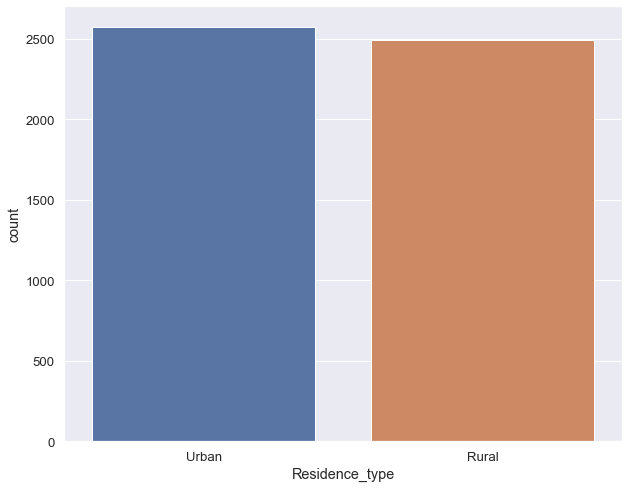

In [63]:
sns.countplot(data=df,x='Residence_type')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

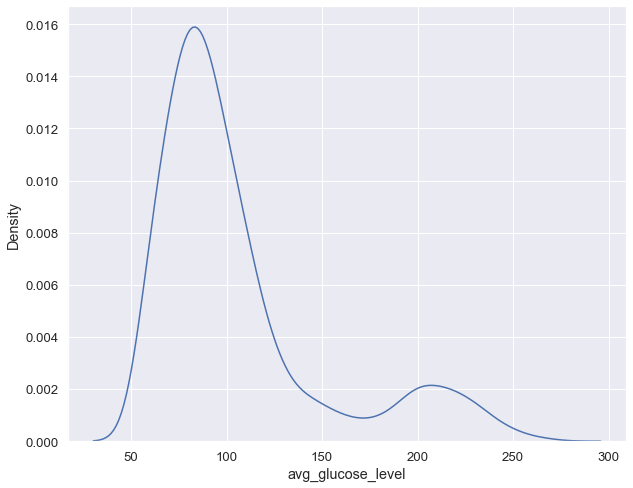

In [64]:
sns.kdeplot(data=df,x='avg_glucose_level')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

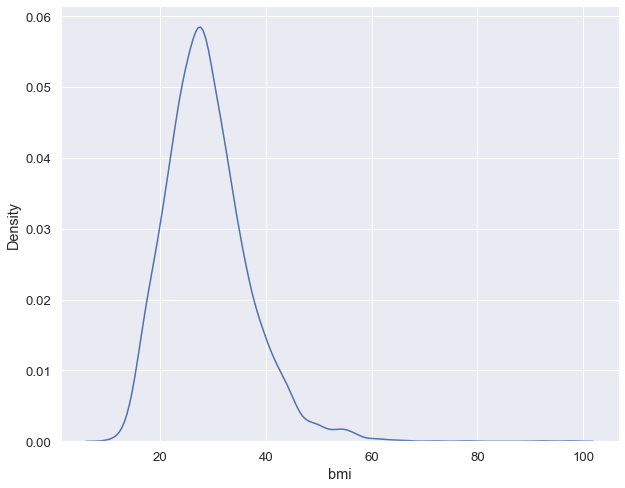

In [65]:
sns.kdeplot(data=df,x='bmi')

In [66]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1501
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

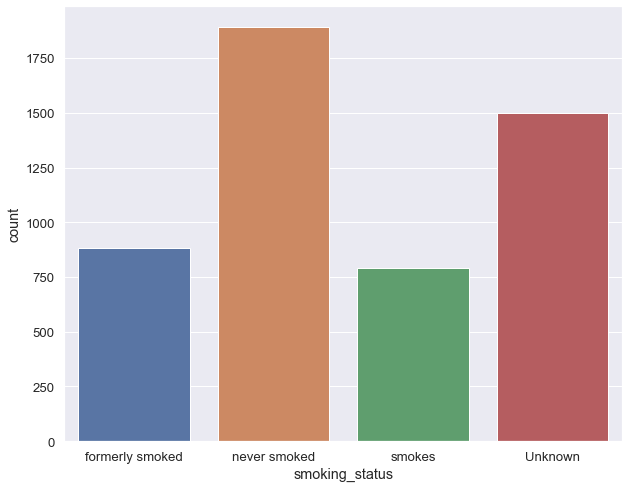

In [67]:
sns.countplot(data=df,x='smoking_status')

In [68]:
df['stroke'].value_counts()

0    4817
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

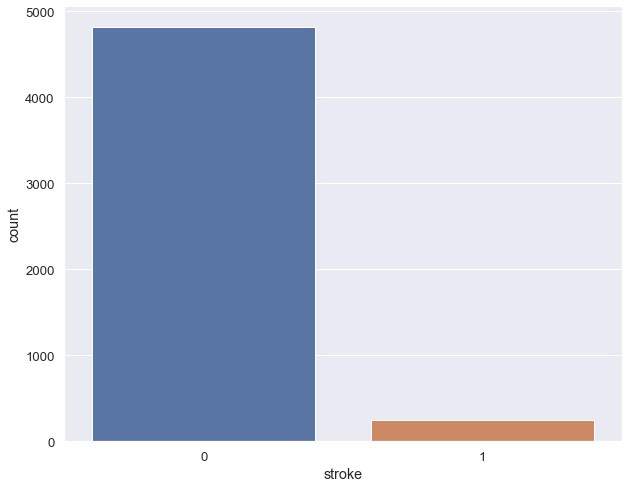

In [69]:
sns.countplot(data=df,x='stroke')

In [70]:
df['Glucose_level'].value_counts()

low            3105
normal         1136
diabetes        445
prediabetes     380
Name: Glucose_level, dtype: int64

<AxesSubplot:xlabel='Glucose_level', ylabel='count'>

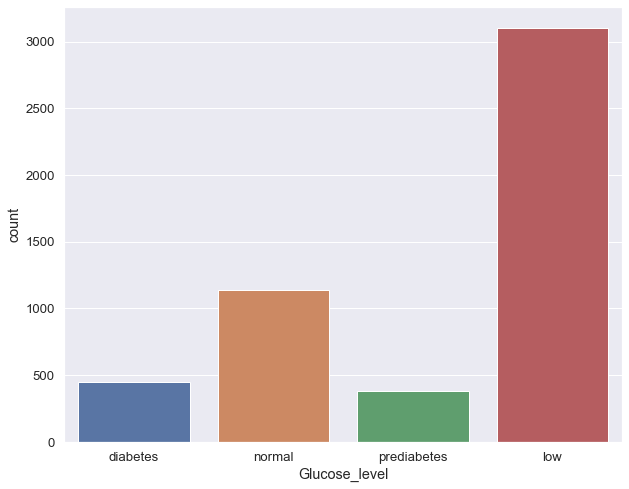

In [71]:
sns.countplot(data=df,x='Glucose_level')

## Detect outliers

<AxesSubplot:xlabel='age'>

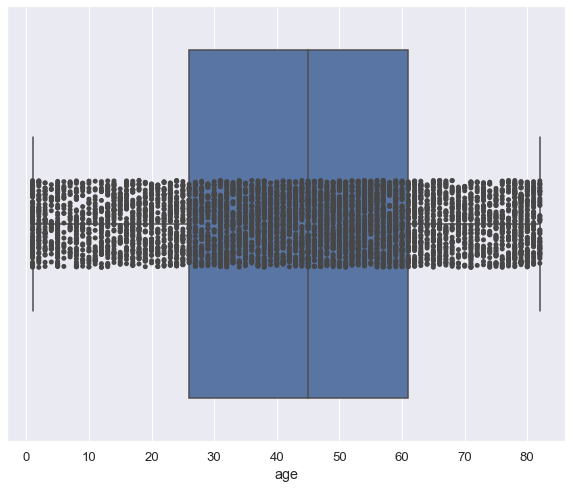

In [72]:
sns.boxplot(x='age', data=df)
sns.stripplot(x='age', data=df, color="#474646")

<AxesSubplot:xlabel='avg_glucose_level'>

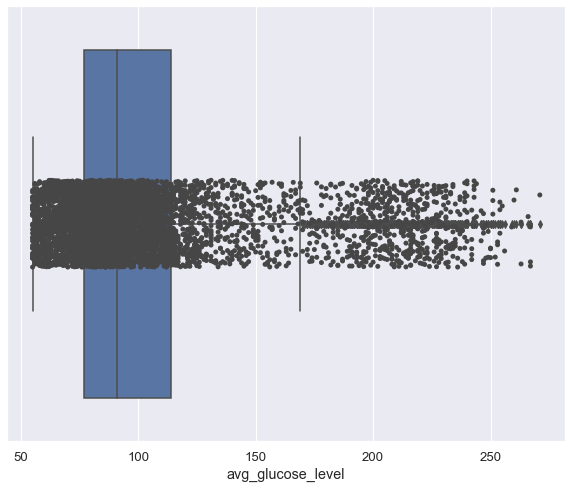

In [73]:
sns.boxplot(x='avg_glucose_level', data=df,hue='stroke')
sns.stripplot(x='avg_glucose_level', data=df, color="#474646")

In [74]:
indexavg_glucose_level = df[((df['avg_glucose_level'] >220) & (df['stroke'] == 0)) ]

In [75]:
indexavg_glucose_level

gender  age  hypertension  heart_disease ever_married      work_type  \
256   Female   75             0              1          Yes  Self-employed   
303     Male   66             0              0          Yes        Private   
325     Male   76             0              0          Yes        Private   
326   Female   57             1              0          Yes        Private   
330   Female   78             0              0          Yes        Private   
...      ...  ...           ...            ...          ...            ...   
4921    Male   72             0              1          Yes        Private   
4983    Male   76             1              0          Yes        Private   
4986    Male   58             0              1          Yes        Private   
5034  Female   79             0              0           No        Private   
5061    Male   41             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
256           Rural                243  27.0     never smoked       0   
303           Rural                242  35.3           smokes       0   
325           Rural                234  34.3  formerly smoked       0   
326           Rural                235  40.1     never smoked       0   
330           Urban                243  26.1     never smoked       0   
...             ...                ...   ...              ...     ...   
4921          Rural                238   NaN           smokes       0   
4983          Rural                267  30.5     never smoked       0   
4986          Rural                225  26.5           smokes       0   
5034          Urban                253  28.8  formerly smoked       0   
5061          Urban                223  32.3     never smoked       0   

     Glucose_level  
256       diabetes  
303       diabetes  
325       diabetes  
326       diabetes  
330       diabetes  
...            ...  
4921      diabetes  
4983      diabetes  
4986      diabetes  
5034      diabetes  
5061      diabetes  

[169 rows x 12 columns]

### after checking for outlier i find that it important

<AxesSubplot:xlabel='bmi'>

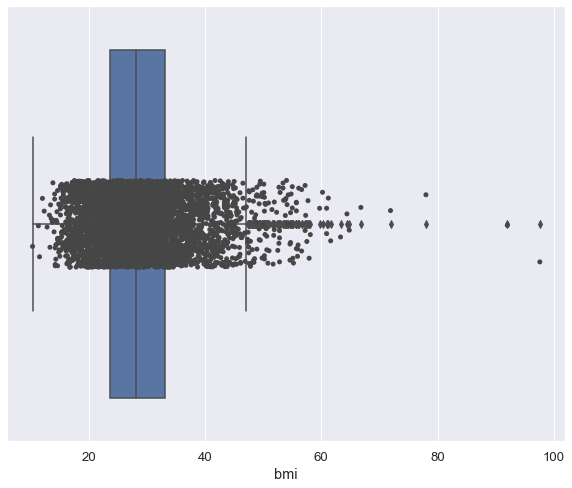

In [76]:
sns.boxplot(x='bmi', data=df)
sns.stripplot(x='bmi', data=df, color="#474646")

In [77]:
indexbmi=df[df['bmi']>50].index

In [78]:
df.drop(indexbmi,axis=0,inplace=True)

<AxesSubplot:xlabel='bmi'>

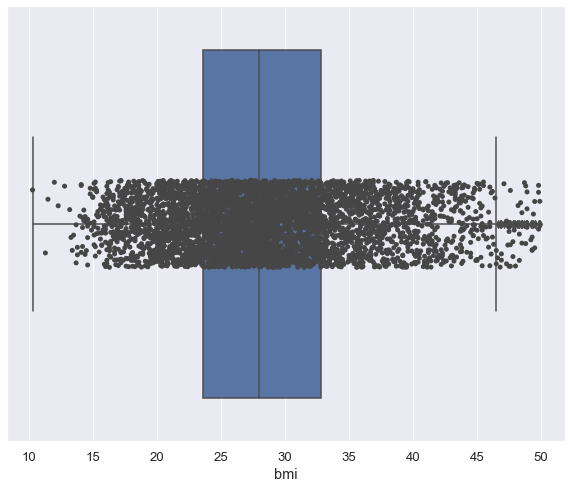

In [79]:
sns.boxplot(x='bmi', data=df)
sns.stripplot(x='bmi', data=df, color="#474646")

## Bivariate analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

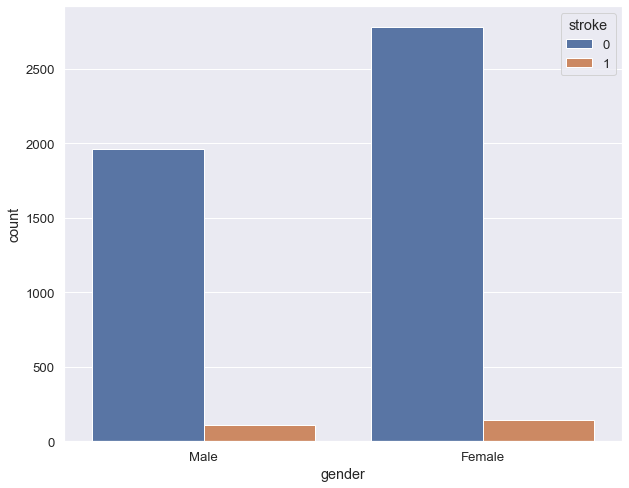

In [80]:
sns.countplot(data=df,x='gender',hue="stroke")

In [81]:
df.head(1)

gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban                228  36.6  formerly smoked       1   

  Glucose_level  
0      diabetes

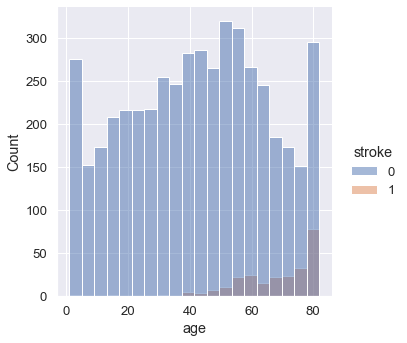

In [82]:
sns.displot(data=df,x='age',hue='stroke')

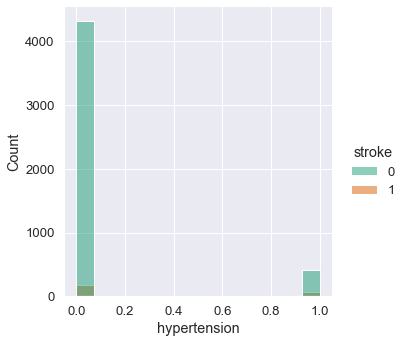

In [83]:
sns.displot(data=df,x='hypertension',hue='stroke',palette='Dark2')

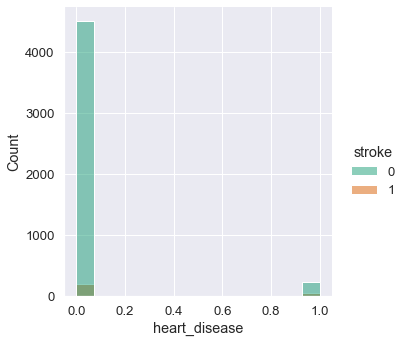

In [84]:
sns.displot(data=df,x='heart_disease',hue='stroke',palette='Dark2')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

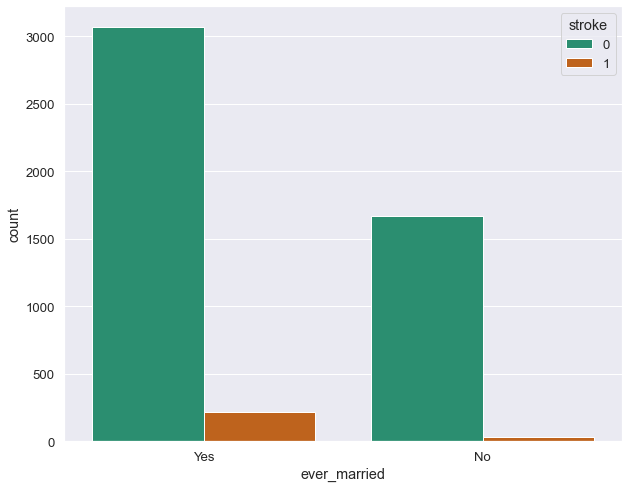

In [85]:
sns.countplot(data=df,x='ever_married',hue='stroke',palette='Dark2')

<AxesSubplot:xlabel='work_type', ylabel='count'>

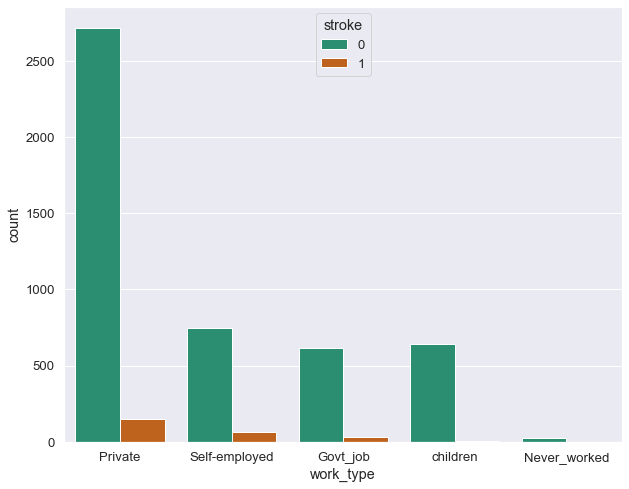

In [86]:
sns.countplot(data=df,x='work_type',hue='stroke',palette='Dark2')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

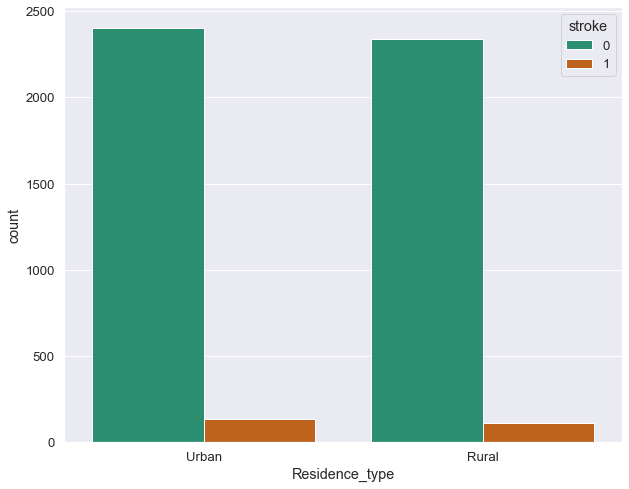

In [87]:
sns.countplot(data=df,x='Residence_type',hue='stroke',palette='Dark2')

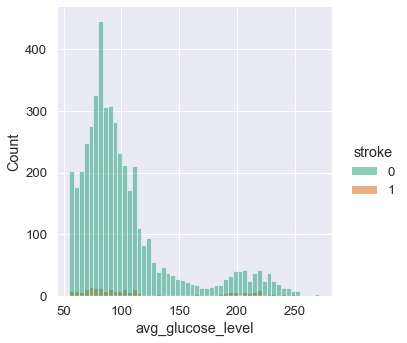

In [88]:
sns.displot(data=df,x='avg_glucose_level',hue='stroke',palette='Dark2')

In [89]:
px.scatter(df,x='avg_glucose_level',y='age',template='plotly_dark',color='stroke')

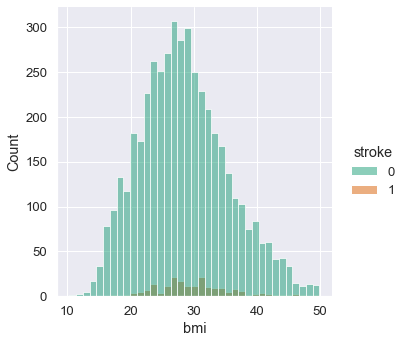

In [90]:
sns.displot(data=df,x='bmi',hue='stroke',palette='Dark2')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

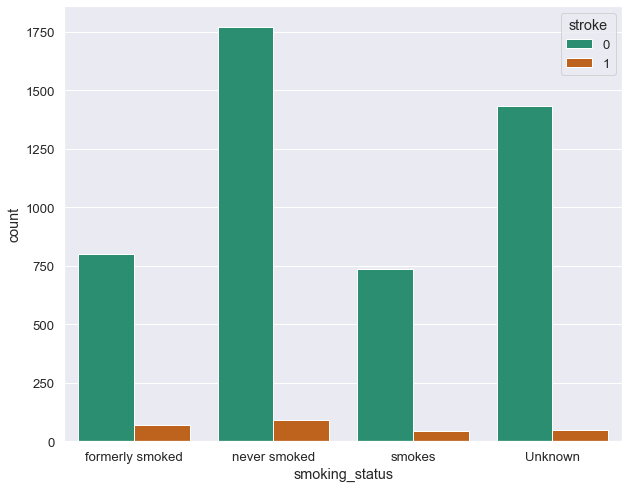

In [91]:
sns.countplot(data=df,x='smoking_status',hue='stroke',palette='Dark2')

<AxesSubplot:xlabel='Glucose_level', ylabel='count'>

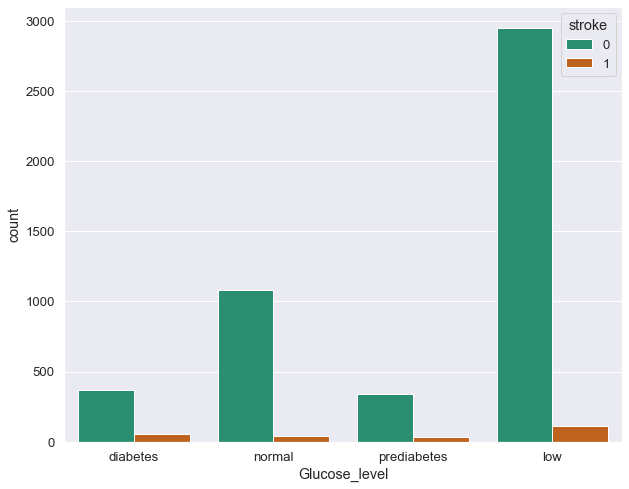

In [92]:
sns.countplot(data=df,x='Glucose_level',hue='stroke',palette='Dark2')

## Analyse the data

In [93]:
df.head(1)

gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban                228  36.6  formerly smoked       1   

  Glucose_level  
0      diabetes

### How many gender has heart disease

In [94]:
df['dummy']=1

In [95]:
pd.pivot_table(data=df,index='heart_disease',columns='gender',values='dummy',aggfunc=len)

gender         Female  Male
heart_disease              
0                2808  1904
1                 112   163

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

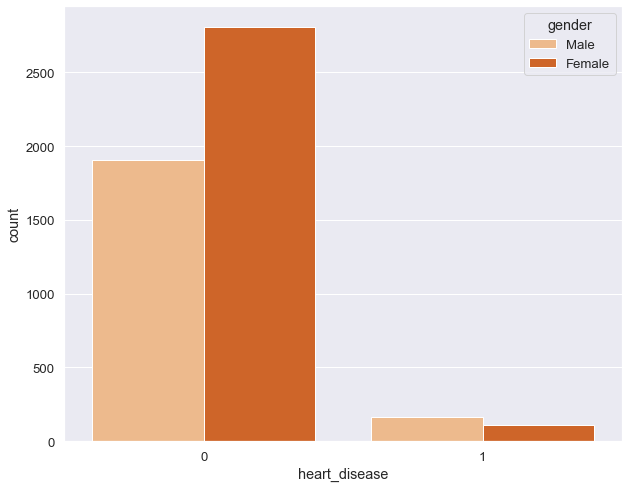

In [96]:
sns.countplot(data = df, x='heart_disease', hue='gender',palette=('Oranges'))

###  Male/Female who has more strokes.

In [97]:
pd.pivot_table(data=df,index='gender',columns='stroke',values='dummy',aggfunc=len)

stroke     0    1
gender           
Female  2780  140
Male    1959  108

<AxesSubplot:xlabel='gender', ylabel='count'>

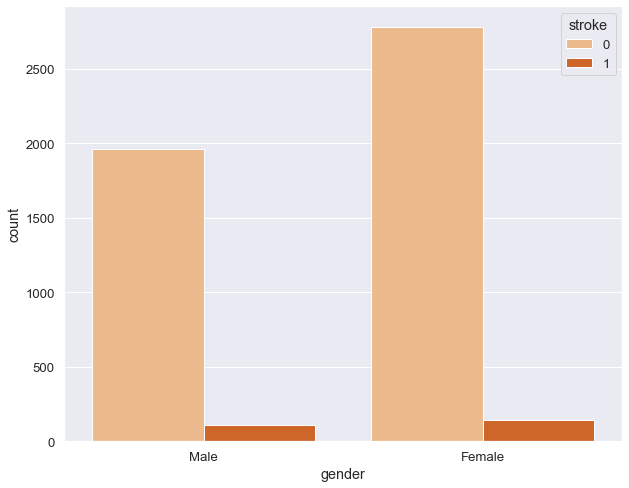

In [98]:
sns.countplot(data = df, x='gender', hue='stroke',palette=('Oranges'))

###  Is hypertension a cause?

<AxesSubplot:xlabel='hypertension', ylabel='count'>

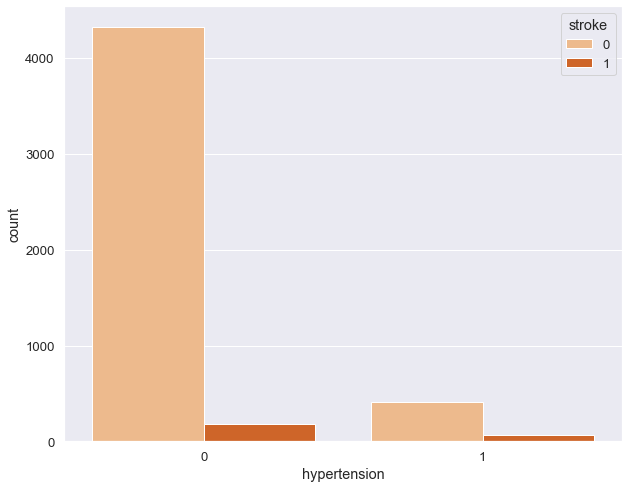

In [99]:
sns.countplot(data = df, x='hypertension', hue='stroke',palette=('Oranges'))

In [100]:
#The number of people without hypertension are way less than people who has it

## Let's have a look on the distribution of stroke patient's age 

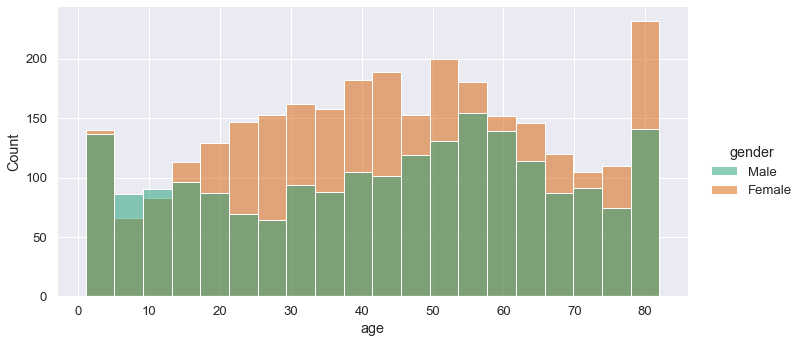

In [101]:
sns.displot(data = df, x='age',hue='gender',aspect=2,palette="Dark2")

## BMI of all the patient sample with stroke and without strok

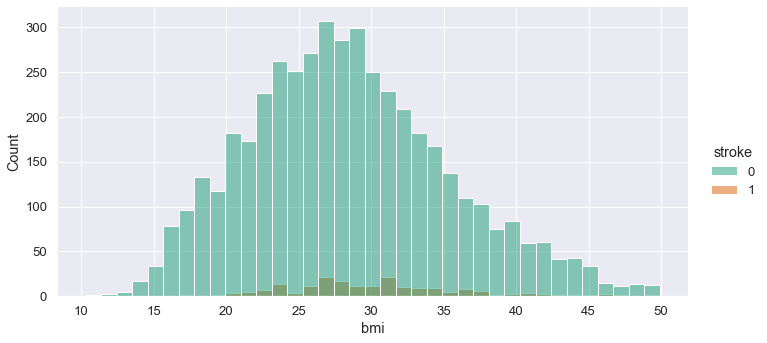

In [102]:
sns.displot(data=df,x='bmi',hue='stroke' , aspect=2 , palette='Dark2' )

## Count of patients for every work type

In [103]:
pd.pivot_table(data=df,index='stroke',columns='work_type',values='dummy',aggfunc=sum)

work_type  Govt_job  Never_worked  Private  Self-employed  children
stroke                                                             
0             613.0          22.0   2718.0          744.0     642.0
1              33.0           NaN    148.0           65.0       2.0

<AxesSubplot:xlabel='work_type', ylabel='count'>

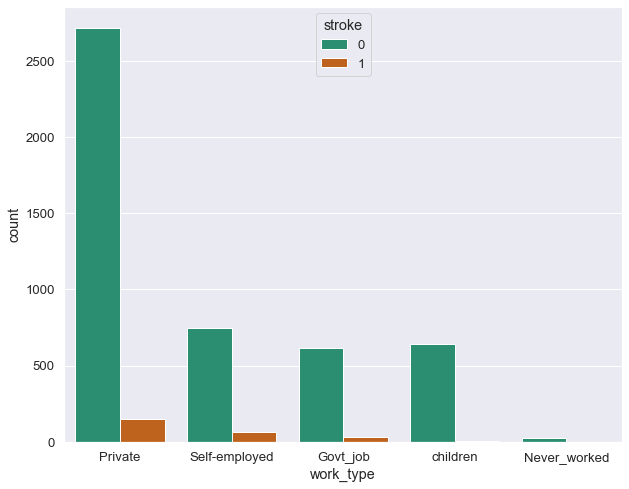

In [104]:
sns.countplot(data=df,x='work_type',hue='stroke', palette='Dark2' , order = df['work_type'].value_counts().index )

## What is the relationship between the glucose level and the target?

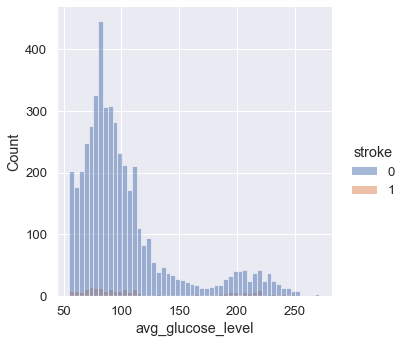

In [105]:
sns.displot(data=df,x='avg_glucose_level',hue='stroke')

## Patient work type having a stroke 

In [106]:
df['work_type'].value_counts()

Private          2866
Self-employed     809
Govt_job          646
children          644
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

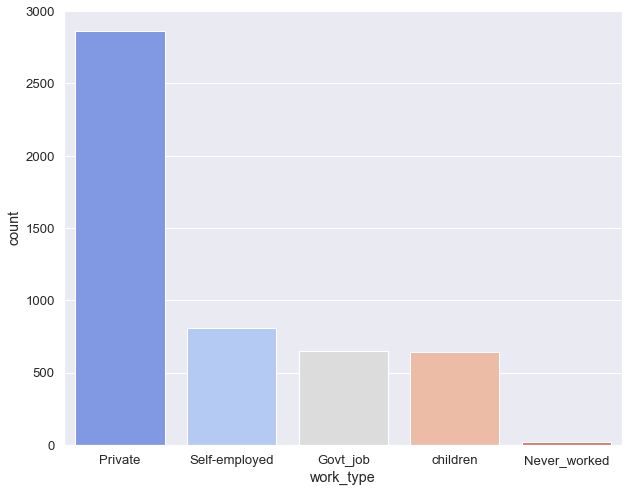

In [107]:
sns.countplot(data=df,x='work_type',palette='coolwarm' )

In [108]:
x=df[df["stroke"].isin([1])]
x

gender  age  hypertension  heart_disease ever_married      work_type  \
0      Male   67             0              1          Yes        Private   
1    Female   61             0              0          Yes  Self-employed   
2      Male   80             0              1          Yes        Private   
3    Female   49             0              0          Yes        Private   
4    Female   79             1              0          Yes  Self-employed   
..      ...  ...           ...            ...          ...            ...   
244    Male   57             0              0          Yes        Private   
245  Female   14             0              0           No       children   
246  Female   75             0              0          Yes  Self-employed   
247    Male   71             1              0          Yes  Self-employed   
248  Female   78             0              0          Yes        Private   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0            Urban                228  36.6  formerly smoked       1   
1            Rural                202   NaN     never smoked       1   
2            Rural                105  32.5     never smoked       1   
3            Urban                171  34.4           smokes       1   
4            Rural                174  24.0     never smoked       1   
..             ...                ...   ...              ...     ...   
244          Rural                 84  36.7          Unknown       1   
245          Rural                 57  30.9          Unknown       1   
246          Rural                 78  29.3  formerly smoked       1   
247          Rural                 87   NaN          Unknown       1   
248          Rural                 78  19.6          Unknown       1   

    Glucose_level  dummy  
0        diabetes      1  
1        diabetes      1  
2          normal      1  
3     prediabetes      1  
4     prediabetes      1  
..            ...    ...  
244           low      1  
245           low      1  
246           low      1  
247           low      1  
248           low      1  

[248 rows x 13 columns]

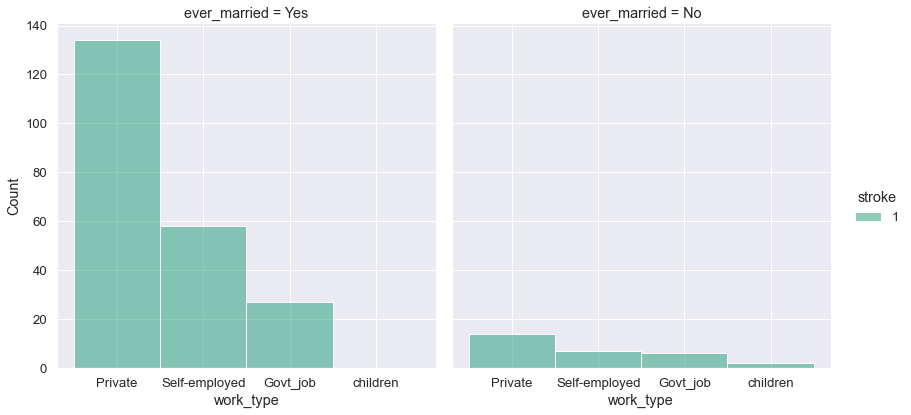

In [109]:
sns.displot(x,x='work_type',col='ever_married',hue='stroke',height=6,aspect=1,palette='Dark2')

### to find the males those are working in private company & they have heart disease with smoking

In [110]:
df.loc[(df["gender"]=="Male") & (df["work_type"]=="Private") & (df["heart_disease"]==1) &(df["smoking_status"]=="smokes")]

gender  age  hypertension  heart_disease ever_married work_type  \
16     Male   64             0              1          Yes   Private   
42     Male   82             0              1          Yes   Private   
86     Male   61             0              1          Yes   Private   
97     Male   58             0              1          Yes   Private   
111    Male   80             0              1          Yes   Private   
161    Male   71             0              1          Yes   Private   
184    Male   61             1              1          Yes   Private   
193    Male   68             1              1          Yes   Private   
220    Male   81             1              1          Yes   Private   
239    Male   60             0              1          Yes   Private   
626    Male   52             0              1           No   Private   
1992   Male   64             0              1          Yes   Private   
2521   Male   73             0              1          Yes   Private   
2544   Male   71             0              1          Yes   Private   
2818   Male   80             0              1          Yes   Private   
2961   Male   55             1              1          Yes   Private   
3997   Male   62             0              1          Yes   Private   
4136   Male   63             0              1           No   Private   
4165   Male   71             0              1          Yes   Private   
4197   Male   53             0              1          Yes   Private   
4921   Male   72             0              1          Yes   Private   
4986   Male   58             0              1          Yes   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
16            Urban                191  37.5         smokes       1   
42            Urban                144  26.4         smokes       1   
86            Rural                111  27.3         smokes       1   
97            Rural                240  31.4         smokes       1   
111           Urban                 68  24.2         smokes       1   
161           Urban                 81   NaN         smokes       1   
184           Urban                112  37.4         smokes       1   
193           Rural                271  31.1         smokes       1   
220           Urban                250  28.1         smokes       1   
239           Urban                 91  35.9         smokes       1   
626           Rural                101  31.2         smokes       0   
1992          Urban                103  34.3         smokes       0   
2521          Rural                 62  25.2         smokes       0   
2544          Urban                215  39.2         smokes       0   
2818          Rural                 82  26.3         smokes       0   
2961          Rural                 64  32.1         smokes       0   
3997          Rural                 90  25.8         smokes       0   
4136          Urban                 75  25.7         smokes       0   
4165          Rural                 70  25.0         smokes       0   
4197          Rural                 95  35.2         smokes       0   
4921          Rural                238   NaN         smokes       0   
4986          Rural                225  26.5         smokes       0   

     Glucose_level  dummy  
16     prediabetes      1  
42     prediabetes      1  
86          normal      1  
97        diabetes      1  
111            low      1  
161            low      1  
184         normal      1  
193       diabetes      1  
220       diabetes      1  
239            low      1  
626         normal      1  
1992        normal      1  
2521           low      1  
2544      diabetes      1  
2818           low      1  
2961           low      1  
3997           low      1  
4136           low      1  
4165           low      1  
4197           low      1  
4921      diabetes      1  
4986      diabetes      1

In [111]:
len(df.loc[(df["gender"]=="Male") & (df["work_type"]=="Private") & (df["heart_disease"]==1) &(df["smoking_status"]=="smokes")])

22

### to find the male & female those are under 15-30 age & average glucose level is 80-150

In [112]:
df.loc[(df["age"]>15) & (df["age"]<=30) & (df["avg_glucose_level"]>80) & (df["avg_glucose_level"]<=150)]

gender  age  hypertension  heart_disease ever_married      work_type  \
265   Female   20             0              0           No        Private   
279     Male   27             0              0          Yes  Self-employed   
286   Female   23             0              0           No        Private   
288   Female   17             0              0           No  Self-employed   
292   Female   16             0              0           No       children   
...      ...  ...           ...            ...          ...            ...   
5077    Male   17             0              0           No        Private   
5080  Female   29             0              0          Yes  Self-employed   
5083  Female   19             0              0           No        Private   
5090    Male   26             0              0           No       Govt_job   
5103  Female   18             0              0           No        Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
265           Urban                 84  19.7         smokes       0   
279           Urban                 82  25.0        Unknown       0   
286           Urban                 94  30.9   never smoked       0   
288           Urban                 82  23.4        Unknown       0   
292           Rural                110  19.5        Unknown       0   
...             ...                ...   ...            ...     ...   
5077          Rural                106  21.0        Unknown       0   
5080          Urban                 90  28.0   never smoked       0   
5083          Urban                 90  24.2        Unknown       0   
5090          Rural                100  21.0         smokes       0   
5103          Urban                 82  46.9        Unknown       0   

     Glucose_level  dummy  
265            low      1  
279            low      1  
286            low      1  
288            low      1  
292         normal      1  
...            ...    ...  
5077        normal      1  
5080           low      1  
5083           low      1  
5090        normal      1  
5103           low      1  

[493 rows x 13 columns]

## Count of patients for every smoking_status 

In [113]:
pd.pivot_table(data=df,index='stroke',columns='smoking_status',values='dummy',aggfunc=len)

smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
0                  1433              801          1770     735
1                    47               70            89      42

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

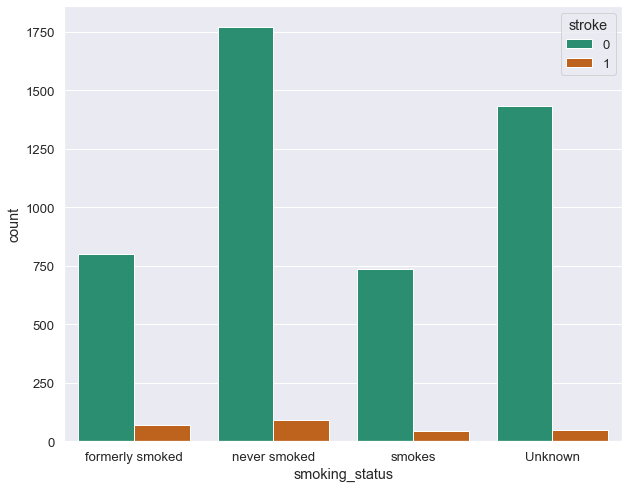

In [114]:
sns.countplot(data=df,x='smoking_status',hue='stroke', palette='Dark2' )

## Corrolation between features



<AxesSubplot:>

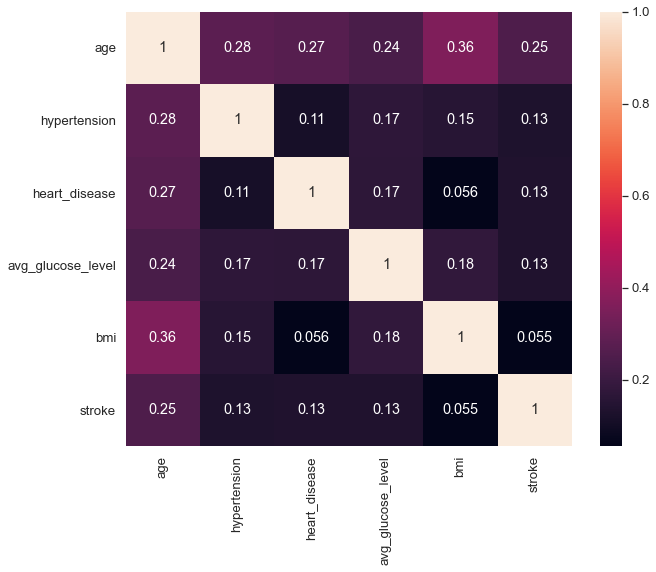

In [115]:
sns.heatmap(data=df.drop(['dummy'], axis=1).corr(),annot=True)

### 1) No strong correlation between our features.
### 2) The highest correlation can be observed between body mass index(bmi) and age.

In [116]:
df.reset_index(inplace=True,drop=True)

In [117]:
df['stroke'].value_counts()

0    4739
1     248
Name: stroke, dtype: int64

In [118]:
df.drop('dummy',axis=1,inplace=True)

In [119]:
df.to_csv('Strocke',index=False)